# Exemplo correlação cruzada (crosscorrelation)

## Bibliotecas

In [1]:
import numpy as np

def impseq(n0,n1,n2):

    #      Generates x(n) = delta(n-n0); n1 <= n <= n2
    #      ----------------------------------------------
    #      [x,n] = impseq(n0,n1,n2)
    #

    n=np.array(range(n1,n2+1))
    x = n-n0
    for i in range(len(x)):
        if x[i]!=0: x[i]=0
        else: x[i]=1
    #x = (n-n0) == 0
    return [x,n]

def stepseq(n0,n1,n2):
    #     Generates x(n) = u(n-n0); n1 <= n <= n2
    #     ------------------------------------------
    #     [x,n] = stepseq(n0,n1,n2)
    #
    n=np.arange(n1,n2+1)
    x = n-n0
    for i in range(len(x)):
        if x[i]<0: x[i]=0
        else: x[i]=1
    #x = [(n-n0) >= 0]
    return [x,n]

def  sigadd(x1,n1,x2,n2):
    # % implements y(n) = x1(n)+x2(n)
    # % -----------------------------
    # % [y,n] = sigadd(x1,n1,x2,n2)
    # % y = sum sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # % x2 = second sequence over n2 (n2 can be different from n1)
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1+y2;
    return [y,n]


def  sigmult(x1,n1,x2,n2):
    # % implements y(n) = x1(n)*x2(n)
    # % -----------------------------
    # % [y,n] = sigmult(x1,n1,x2,n2)
    # % y = product sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1*y2
    return [y,n]


def sigshift(x,m,k):
    # % implements y(n) = x(n-k)
    # % -------------------------
    # % [y,n] = sigshift(x,m,k)
    # %
    n = m+k
    y = x.copy()
    return [y,n]


def sigfold(x,n):
    # % implements y(n) = x(-n)
    # % -----------------------
    # % [y,n] = sigfold(x,n)
    # %
    y = np.flip(x)
    n = -np.flip(n)
    return [y,n]

def conv_m(x,nx,h,nh):
    # Modified convolution routine for signal processing
    # --------------------------------------------------
    # [y,ny] = conv_m(x,nx,h,nh)
    # [y,ny] = convolution result
    # [x,nx] = first signal
    # [h,nh] = second signal
    #
    nyb = nx[0]+nh[0]
    nye = nx[len(x)-1] + nh[len(h)-1]
    ny = np.arange(nyb,nye+1)
    y = np.convolve(x,h)
    return [y,ny]



## Correlação entre 2 sequências

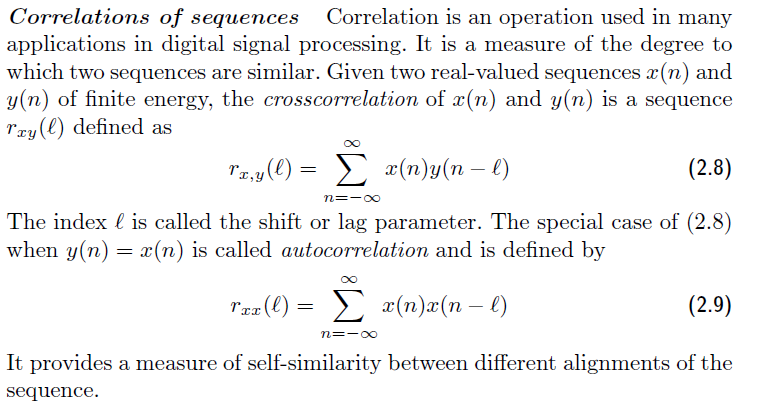

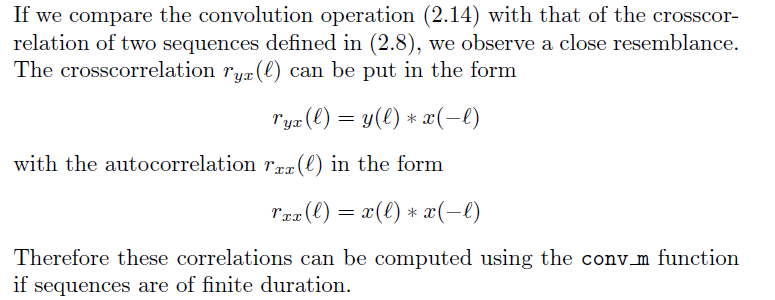

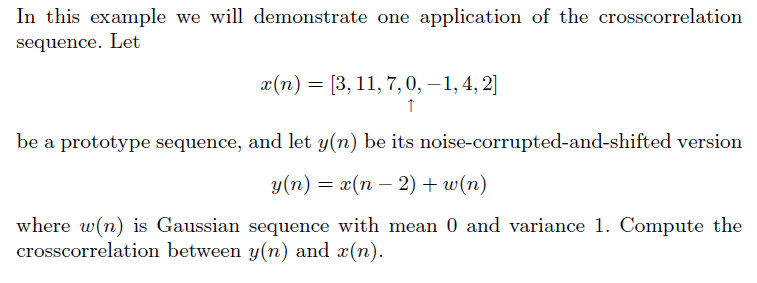

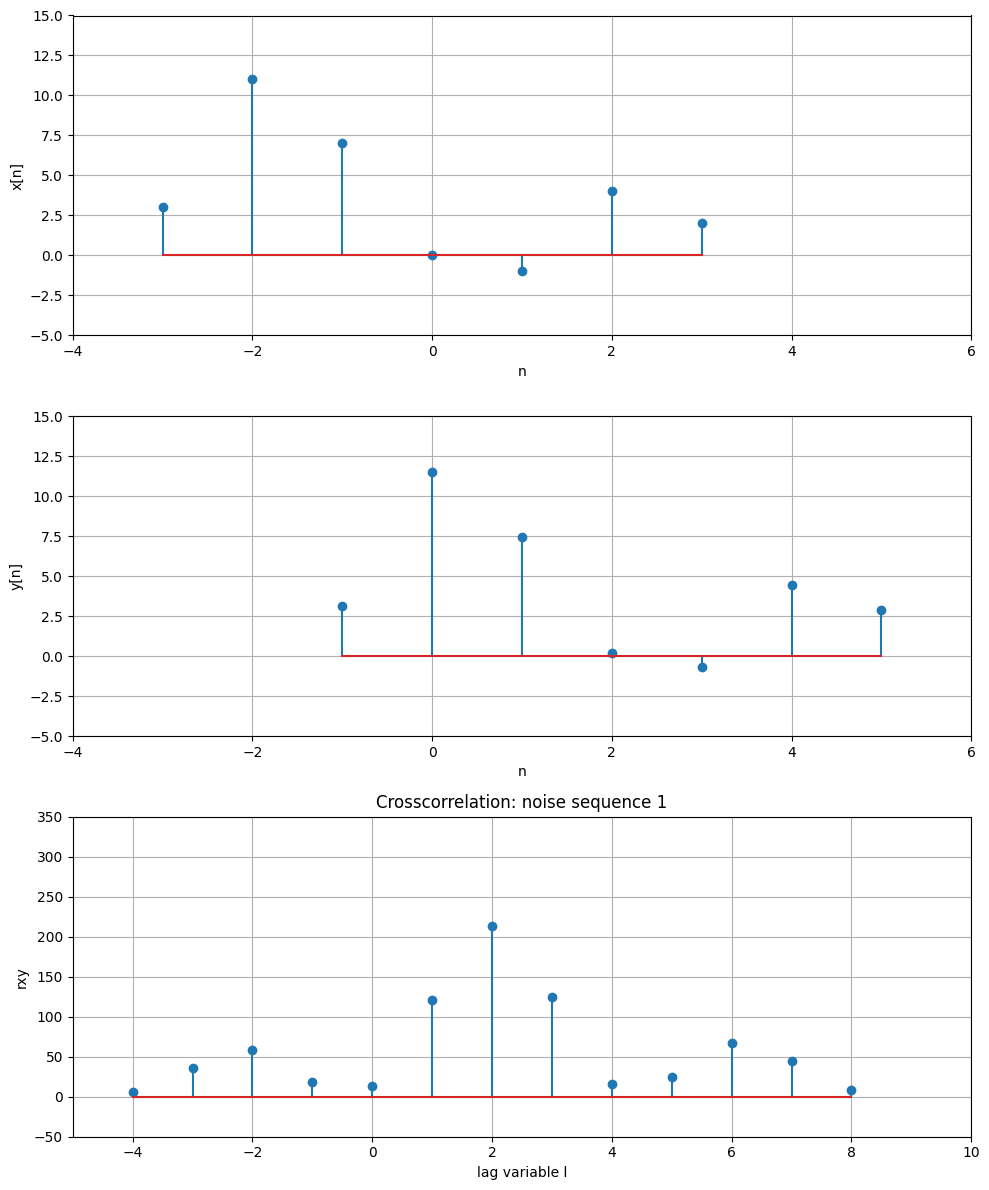

In [16]:
# Correlação entre 2 sinais

# from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np
import matplotlib.pyplot as plt
# noise sequence 1
x =np.array([3, 11, 7, 0, -1, 4, 2])
nx=np.arange(-3,4)                  # given signal x(n)
[y,ny] = sigshift(x,nx,2)           # obtain x(n-2)
w = 1*np.random.rand(len(y))        # Gaussian sequency mean=0
nw = ny                             # generate w(n)
[y,ny] = sigadd(y,ny,w,nw)          # obtain y(n) = x(n-2) + w(n)


fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(10, 12))
axs[0].stem(nx,x)
axs[0].grid()
axs[0].set_xlabel("n")
axs[0].set_ylabel("x[n]")
axs[0].axis([-4,6,-5,15])

axs[1].stem(ny,y)
axs[1].grid()
axs[1].set_xlabel("n")
axs[1].set_ylabel("y[n]")
axs[1].axis([-4,6,-5,15])

[x,nx] = sigfold(x,nx) # obtain x(-n)
[rxy,nrxy] = conv_m(y,ny,x,nx) # crosscorrelation
axs[2].set_title("Crosscorrelation: noise sequence 1")
axs[2].stem(nrxy,rxy)
axs[2].grid()
axs[2].set_xlabel("lag variable l")
axs[2].set_ylabel("rxy")
axs[2].axis([-5,10,-50,350])
fig.tight_layout()

